<a href="https://colab.research.google.com/github/epuujee/data_science/blob/master/biznetwork_mn_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Companies data crawl from Biznetwork.mn***

In [53]:
!pip install bs4
!pip install pandas
!pip install urllib
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [0]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import urllib.parse
import requests
import urllib.request
import matplotlib.pyplot as plt

In [0]:
root_url= "https://www.biznetwork.mn/"
base_url = "company/pg."

In [56]:
my_columns = ['logo', 'name', 'operation']
company_list = []

for x in range(1, 65):   
    url = root_url + base_url + str(x)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml").find(attrs={'class':'companies'})
    myarr = soup.find_all('div')
    
    for a in myarr:
        img = root_url+a.find('img')['src']
        name = a.find('b').string.strip()
        operation = ""
        try:
          operation = a.find('span').string.strip()
        except:
          operation = "Бусад"

        company = [img, name, operation]
        company_list.append(company)


df_companies = pd.DataFrame(company_list, columns=my_columns)

df_companies.head()

,logo,name,operation
0,https://www.biznetwork.mn/l/5/P6-72RLHB0-RLZ36...,Ви Эс Эм ХХК,"Мэдээлэл технологи, Харилцаа холбоо"
1,https://www.biznetwork.mn/l/4/DN-77387FN-XDZ54...,Каппэ Бэнэ Монголиа ХХК,"Аялал жуулчлал, зочид буудал, нийтийн хоолны ү..."
2,https://www.biznetwork.mn/l/1/8Y-RJOTM44-FXC9V...,Юнител Групп,"Мэдээлэл технологи, Харилцаа холбоо"
3,https://www.biznetwork.mn/l/5/WC-ZLVIFUM-XVT5V...,"""Суварга буян"" ХХК",Үйлчилгээ
4,https://www.biznetwork.mn/l/2/DS-82D7YN7-67N9O...,Мөнхийн Тун ХХК,"Эрүүл мэнд, Эмнэлэг, Эм хангамж"


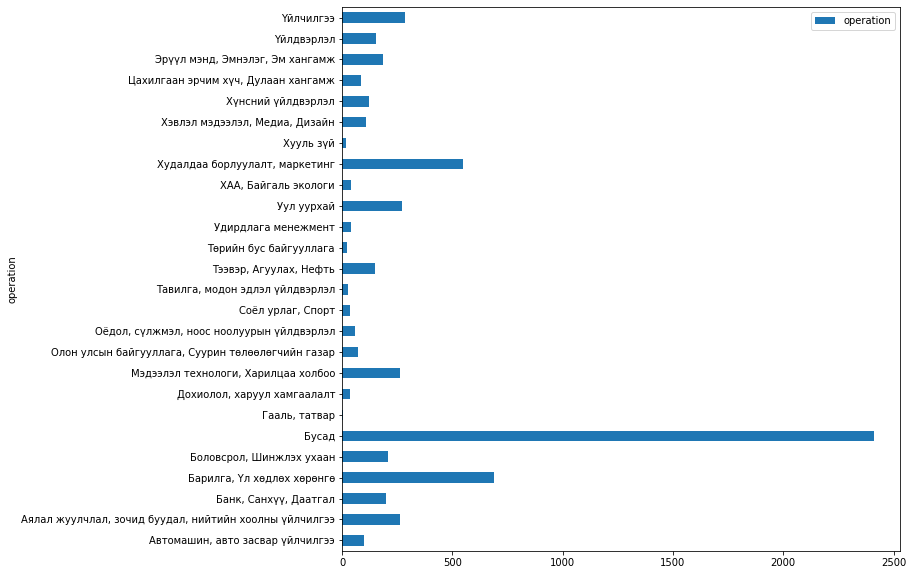

In [108]:
df_count = pd.DataFrame(df_companies.groupby(['operation'])['operation'].count())
df_count.plot.barh(figsize=(10,10), stacked=True)